## [All About Vis] How to Make the Right Barplot?

Visualization is a beautiful and insightful discipline and field.

Sometimes information is important, and sometimes the aesthetic is important.

However, I wrote this notebook because it would be nice to think about the more informational aspect from the standpoint of data analysis.

In [1]:
!pip install seaborn==0.11

     |████████████████████████████████| 283 kB 1.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(mpl.__version__)
print(sns.__version__)

3.2.1
0.11.0


In [3]:
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Use of bar graph

**Barplot** is a visualization method that uses the size of a bar to represent the values of your data.

1. Suitable for comparing numerical values by category
2. Suitable for comparing data between groups

## Basic Usage

Draw a bar graph based on the value of the `race/ethnicity` as follows:

Barplots are usually drawn on a count-based basis, which uses the `.value_counts()` method in the pandas.

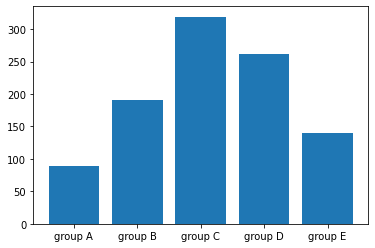

In [4]:
fig, ax = plt.subplots(1, 1)
tmp = data['race/ethnicity'].value_counts().sort_index()
ax.bar(tmp.index, tmp)
plt.show()

### Horizontal Barplot 

Barplot's readability is poor in some situations.

1. Too many categories can make webpages or documents less readable.
2. Rotation cannot resolve a category when its name is too long
    - There are many ways to rotate axis labels, but I prefer the `set_xticklabels()` method.


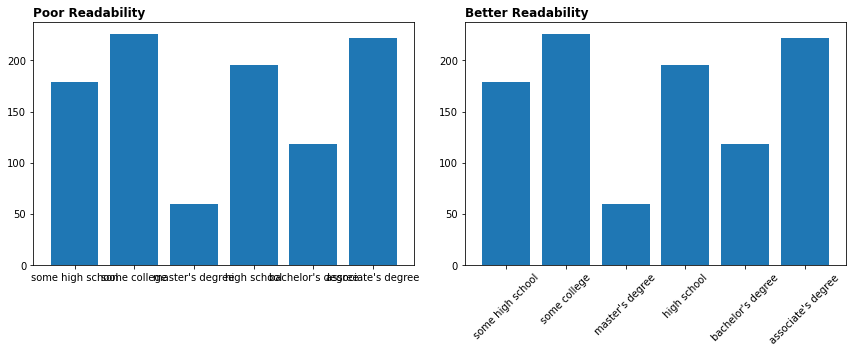

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
tmp = data['parental level of education'].value_counts().sort_index()[::-1]

# ax[0] : wrong plot 
ax[0].bar(tmp.index, tmp)
ax[0].set_title('Poor Readability', loc='left', fontsize=12, fontweight='bold')

# ax[1] : better way
ax[1].bar(tmp.index, tmp)
ax[1].set_xticklabels(tmp.index, rotation=45)
ax[1].set_title('Better Readability', loc='left', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

The above rotation has increased readability little(It is obvious that the labels on the chart are difficult to read), but may cause some confusion.

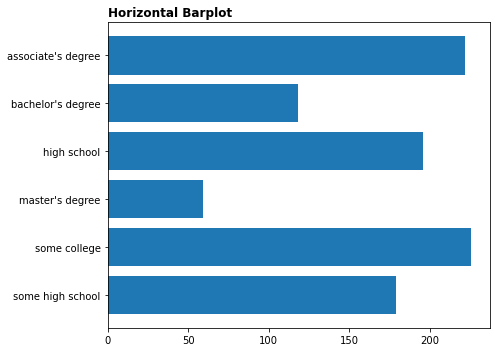

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
tmp = data['parental level of education'].value_counts().sort_index()[::-1]

ax.barh(tmp.index, tmp)
ax.set_title('Horizontal Barplot', loc='left', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Multiple Bar in One Ax.

In order to make comparisons between groups, sometimes it's better to represent one plot rather than several barplots.

There are two ways.

1. Stacked Barplot
2. Grouped Barplot

### Stacked Barplot

Stacked barplots are expressions that represent a group as a bar.

It is characterized by the distinctiveness of groups in the basic bar chart. But this isn't quite a good way to put it. Let's see why.

In [7]:
tmp_pivot_table = data.groupby('race/ethnicity')['parental level of education'].value_counts().unstack()
display(tmp_pivot_table)

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


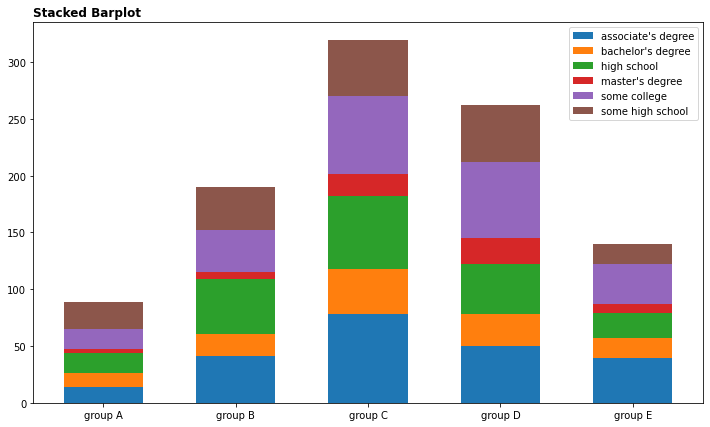

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
bf = np.zeros(len(tmp_pivot_table), dtype=int)
for col in tmp_pivot_table.columns:
    ax.bar(tmp_pivot_table.index, tmp_pivot_table[col], width=0.6, bottom=bf, label=col)
    bf += tmp_pivot_table[col]

ax.set_title('Stacked Barplot', loc='left', fontsize=12, fontweight='bold')    
ax.legend()
plt.show()

In chart, distributions of blue(associate's degree) can be compared to each other, but distributions of different colors cannot be compared roughly specifically. As an example, it is not possible to compare the size of purple(some college) for group C and group D.

If the number of categories in the group is small, adjusting the transparency and overlapping is one way. As an example, I drew an overlap based on test preparation items.

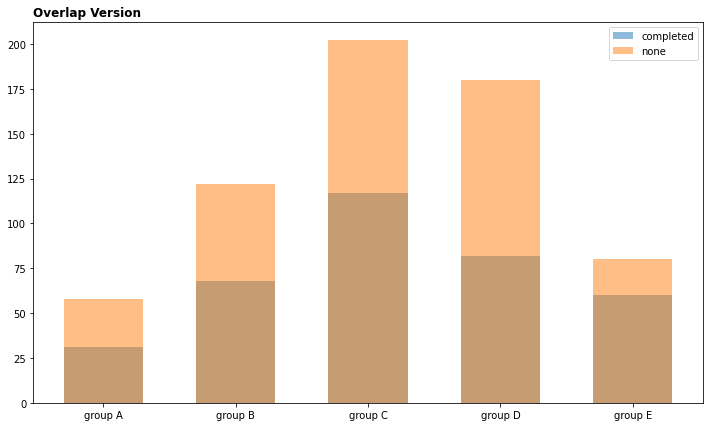

In [9]:
tmp_pivot_table = data.groupby('race/ethnicity')['test preparation course'].value_counts().unstack()
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

for col in tmp_pivot_table.columns:
    ax.bar(tmp_pivot_table.index, tmp_pivot_table[col], width=0.6, alpha=0.5, label=col)

ax.set_title('Overlap Version', loc='left', fontsize=12, fontweight='bold')    
ax.legend()
plt.show()

### Grouped Barplot

It is the group barplot that makes it easy to see the differences within a group.

You can make it easy using seaborn.

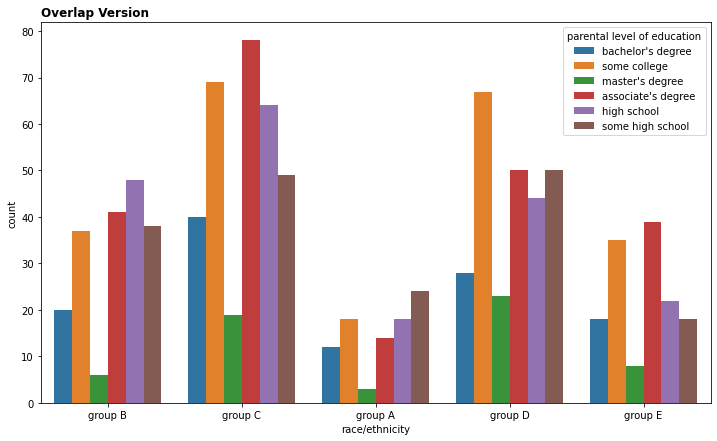

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(x='race/ethnicity', data=data, hue='parental level of education', ax=ax)
ax.set_title('Overlap Version', loc='left', fontsize=12, fontweight='bold')    
plt.show()

## Common Errors and Prevention

I would like to introduce some of the bar graphs and introduce how to fix them because there are many examples of using bar graphs incorrectly.

### Importance of zero-based

It is important that the bar graph starts with zero.
The foundation is based on the following principles.

> **the principle of proportional ink** : *When a shaded region is used to represent a numerical value, the area of that shaded region should be directly proportional to the corresponding value.*

Let's look at an example.

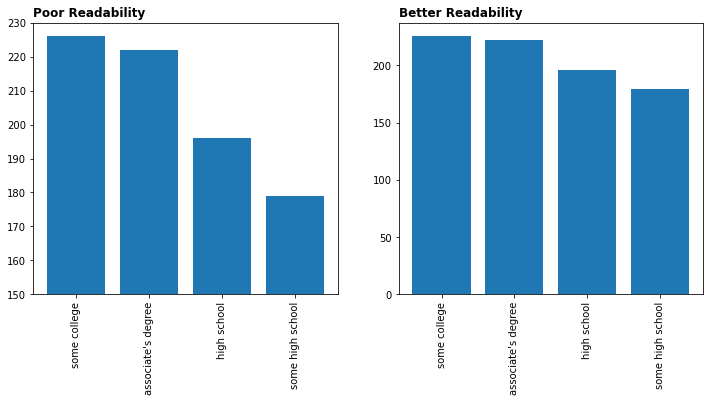

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
tmp = data['parental level of education'].value_counts()[:4]

# ax[0] : wrong plot 
ax[0].bar(tmp.index, tmp)
ax[0].set_title('Poor Readability', loc='left', fontsize=12, fontweight='bold')
ax[0].set_ylim(150, 230)
ax[0].set_xticklabels(tmp.index, rotation=90)

# ax[1] : Better
ax[1].bar(tmp.index, tmp)
ax[1].set_title('Better Readability', loc='left', fontsize=12, fontweight='bold')
ax[1].set_xticklabels(tmp.index, rotation=90)
plt.show()

Often the y range is adjusted to emphasize the difference between the y values.

This makes it seem like there are more differences than the actual differences, so be careful.

If you want to see more of the difference, it is recommended to adjust the ratio of the whole graph.

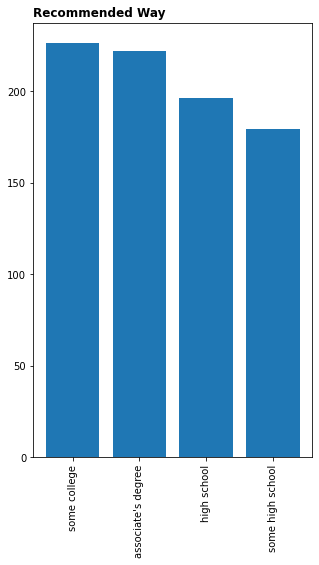

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
tmp = data['parental level of education'].value_counts()[:4]

# ax[0] : wrong plot 
ax.bar(tmp.index, tmp)
ax.set_title('Recommended Way', loc='left', fontsize=12, fontweight='bold')
ax.set_xticklabels(tmp.index, rotation=90)
plt.show()

### Alignment

When drawing a barplot with value_counts, sorting by values is the default.

Sometimes the order of size is important, but sometimes the order is important.

This corresponds to the order type among the types of category variables. Examples include grade level, degree, star rating, etc.

On the other hand, data that are out of order include gender, race, etc.

In the grouped above, I tried to sort them in the order of A, B, C, D, E.

In seaborn countplot, you can adjust the order parameter.

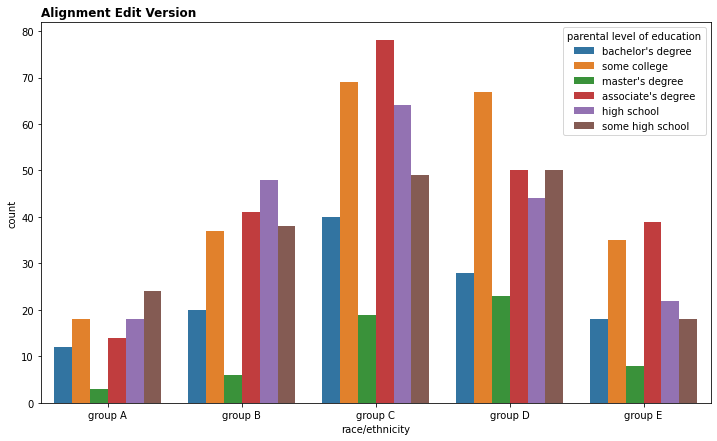

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(x='race/ethnicity', data=data, order=sorted(data['race/ethnicity'].unique()), hue='parental level of education', ax=ax)
ax.set_title('Alignment Edit Version', loc='left', fontsize=12, fontweight='bold')    
plt.show()

### Spacing & Details 

The use of white space and text is important. Details make visualization.

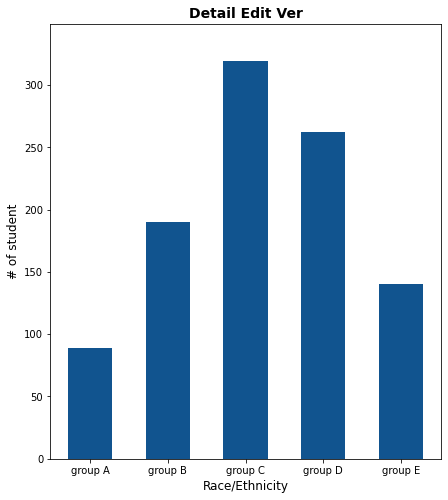

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
tmp = data['race/ethnicity'].value_counts().sort_index()
ax.bar(tmp.index, tmp, color='#11548F', width=0.57)

ax.set_ylabel('# of student',  fontsize=12)
ax.set_xlabel('Race/Ethnicity', fontsize=12)
ax.set_title('Detail Edit Ver', fontsize=14, fontweight='bold')    

ax.set_ylim(0, 349)
plt.show()

### Color Usage

In Kaggle or in papers, there are people who often paint the barplot color with a gradient. It doesn't mean that it's wrong.

However, it would be nice to think more about why we use color.

This is mentioned a lot in other articles, so I'll skip it. Please check the reference,.

### Grid

The grid can be used as needed.

It is better to use the grid to accurately grasp the overall number, and not to use it to grasp trends such as size differences for each category.

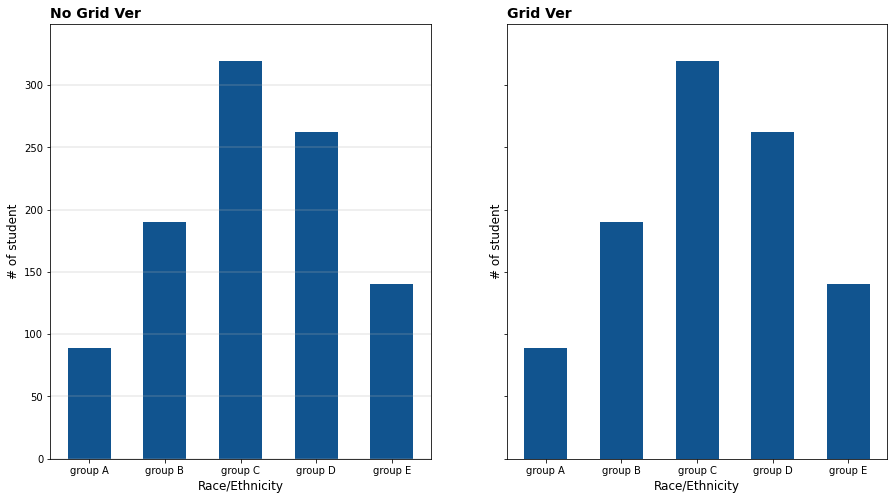

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
tmp = data['race/ethnicity'].value_counts().sort_index()

for i in range(2):
    ax[i].bar(tmp.index, tmp, color='#11548F', width=0.57)
    ax[i].set_ylabel('# of student',  fontsize=12)
    ax[i].set_xlabel('Race/Ethnicity', fontsize=12)

ax[0].set_ylim(0, 349)    
ax[0].set_title('No Grid Ver', loc='left', fontsize=14, fontweight='bold')    
ax[1].set_title('Grid Ver', loc='left', fontsize=14, fontweight='bold')    

ax[0].grid(axis='y', linewidth=0.4)

plt.show()

### Annotation 

If you want to see trends but don't want to be cluttered with grids, you can add Annotation.

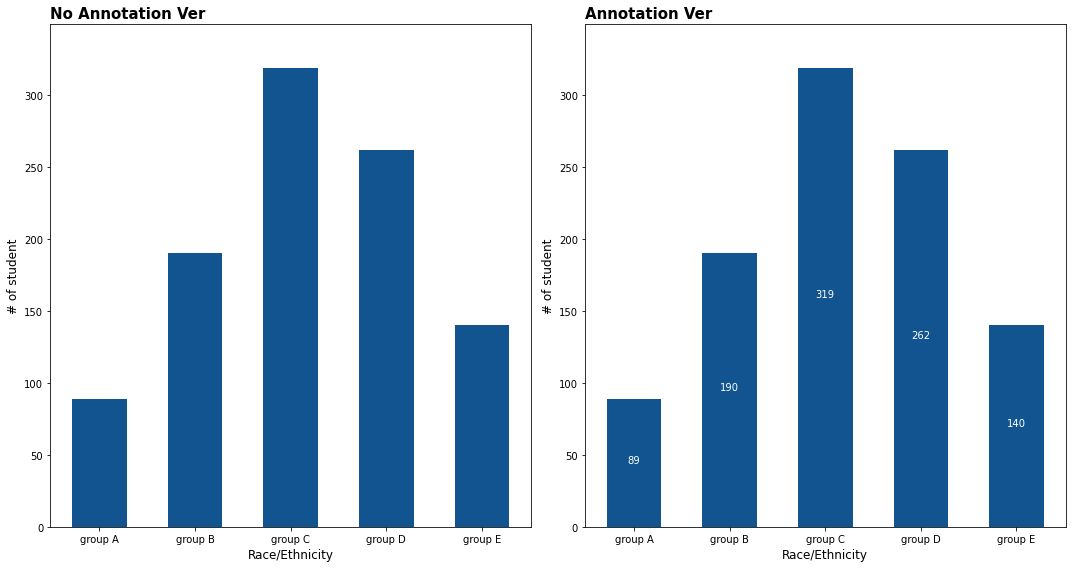

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
tmp = data['race/ethnicity'].value_counts().sort_index()

for i in range(2):
    ax[i].bar(tmp.index, tmp, color='#11548F', width=0.57)
    ax[i].set_ylabel('# of student',  fontsize=12)
    ax[i].set_xlabel('Race/Ethnicity', fontsize=12)
    ax[i].set_ylim(0, 349)    

ax[0].set_title('No Annotation Ver', loc='left', fontsize=15, fontweight='bold')    
ax[1].set_title('Annotation Ver', loc='left', fontsize=15, fontweight='bold')    

for x, val in zip(tmp.index, tmp):
    ax[1].text(x=x, y=val/2, s=str(val), ha='center', c='white' )

plt.tight_layout()    
plt.show()

### Don't Use 3D or Another Format Bar

> [reference](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/7/ch07lvl1sec78/creating-a-3d-bar-plot)

3d is gorgeous and pretty. However, it is too difficult to interpret, including numerical comparison. Do not use other image bar charts or bar charts with round ends.

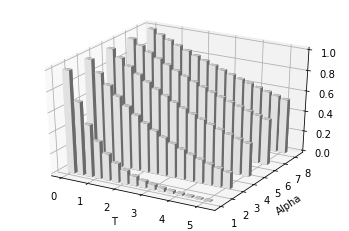

In [17]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Data generation
alpha = np.linspace(1, 8, 5)
t = np.linspace(0, 5, 16)
T, A = np.meshgrid(t, alpha)
data = np.exp(-T * (1. / A))

# Plotting
fig = plt.figure()
ax = fig.gca(projection = '3d')

Xi = T.flatten()
Yi = A.flatten()
Zi = np.zeros(data.size)

dx = .25 * np.ones(data.size)
dy = .25 * np.ones(data.size)
dz = data.flatten()

ax.set_xlabel('T')
ax.set_ylabel('Alpha')
ax.bar3d(Xi, Yi, Zi, dx, dy, dz, color = 'w')

plt.show()

## Reference

- Visualization Analysis & Design, Tamara Munzner
- [Fundamentals of Data Visualization, Claus O. Wilke, O'eilly](https://www.oreilly.com/library/view/fundamentals-of-data/9781492031079/)
- [How to Choose the Right Data Visualization, ChartIO](https://landing.chartio.com/ebook-how-to-choose-the-right-data-visualization)


## My Other Visualization

- [Basic of Statistical Viz : Plotly & Seaborn](https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn)
- [👀 Subin's Visualization Notebooks List](https://www.kaggle.com/subinium/subin-s-visualization-notebooks-list)